In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
zoo = pd.read_csv("C:/Users/Pooja/Desktop/data science/assignments/KNN/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.info

<bound method DataFrame.info of     animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [4]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<AxesSubplot:xlabel='type', ylabel='count'>

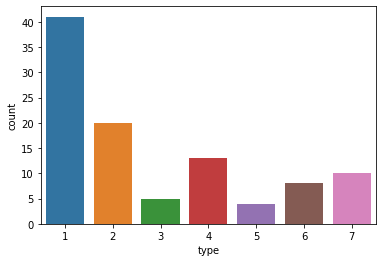

In [7]:
sns.countplot(x=zoo.type)

<AxesSubplot:xlabel='type', ylabel='count'>

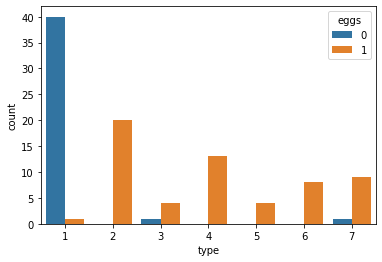

In [8]:
sns.countplot(x=zoo.type,hue=zoo.eggs)

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


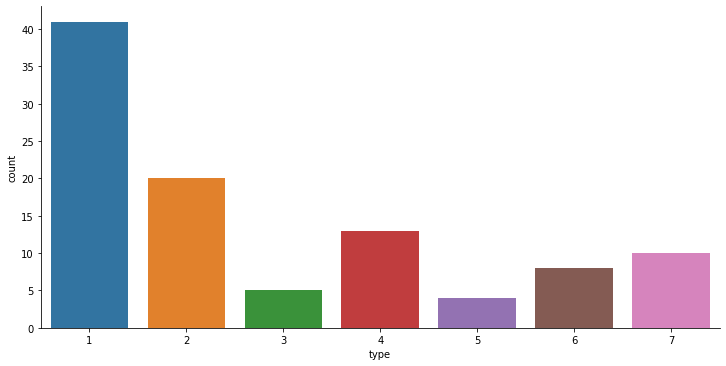

In [9]:
sns.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

In [10]:
# As shown in the graphs above, highest number of animals available in Zoo are Type 1 followed by 2, 4 and 7 respectively

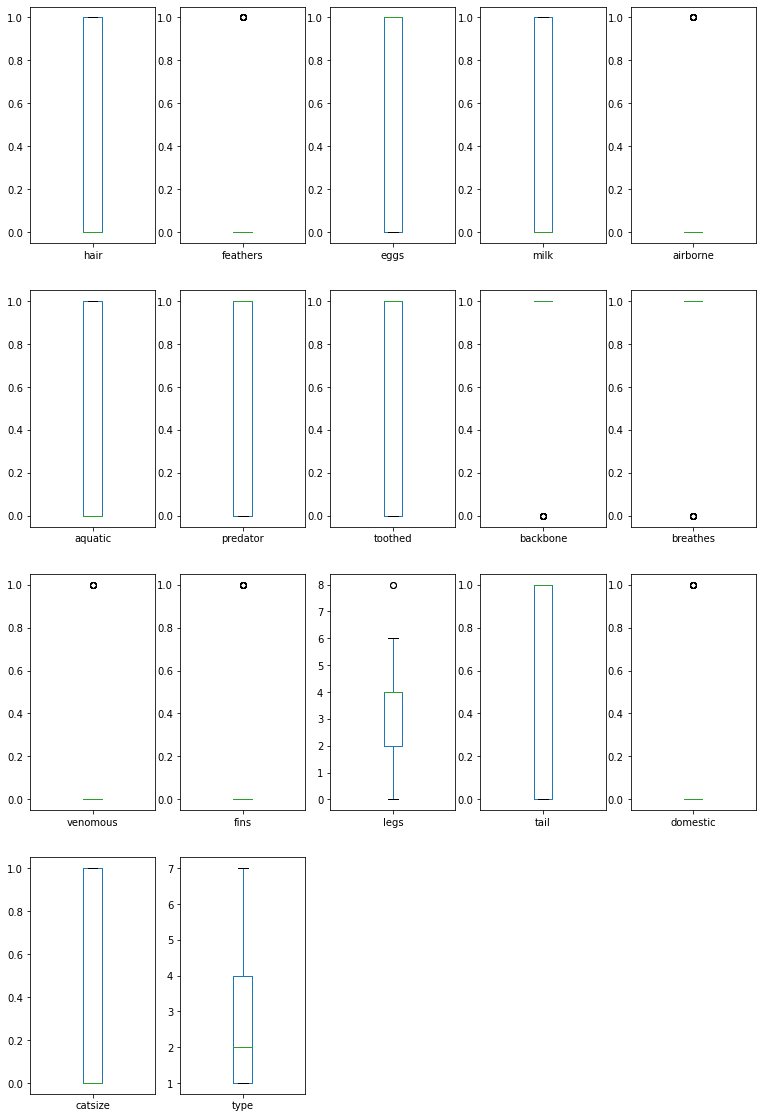

In [11]:
zoo.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [ ]:
# As shown in the graphs above, majority of the variables are evenly distributed amongst the animals. However some of the variables like airbone, backbone, breathes, venomous, fins, tail and domestic is not evenly distributed (i.e majority of animals either have these variable or dont)

In [ ]:
# Defining dependant and independant variable

In [12]:
zoo = zoo.drop('animal name' , axis =1)
X = zoo.drop('type' , axis =1)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
Y = zoo.type
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [ ]:
# Split dataset into training set and test set

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75,random_state=42) 
x_train.shape

(75, 16)

In [15]:
y_train.shape

(75,)

In [16]:
x_test.shape


(26, 16)

In [17]:
y_test.shape

(26,)

In [18]:
y_test

84    1
55    1
66    1
67    1
45    1
39    6
22    1
44    1
10    1
0     1
18    4
30    6
97    6
33    2
77    7
4     1
93    1
78    2
12    4
31    1
76    3
89    5
26    5
42    6
70    1
15    7
Name: type, dtype: int64

In [ ]:
# finding best parameters for KNN using grid search

In [19]:
k_range = list(range(3, 100))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search=grid.fit(x_train,y_train)


C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Pooja\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Pooja\anaconda3

In [20]:
grid_search

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]},
             scoring='accuracy')

In [21]:
grid_search.best_params_

{'n_neighbors': 3}

In [22]:
grid_search.best_score_

0.8821428571428571

In [ ]:
# The best score is observed when number of neighbors taken 3

In [23]:
# Building the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.score(x_train,y_train)

0.9866666666666667

In [25]:
predict = knn.predict(x_test)
predict

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7], dtype=int64)

In [26]:
predictvals = pd.DataFrame({'actual vals':y_test,'predicted vals' : predict})
predictvals.shape


(26, 2)

In [27]:
predictvals

,actual vals,predicted vals
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1
39,6,6
22,1,1
44,1,1
10,1,1
0,1,1


In [28]:
# testing accuracy
metrics.accuracy_score(y_test, predict)

0.9615384615384616

In [ ]:
# model has an accuracy of 96% when number of neighbors are taken as 3.